In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, fixed, FloatSlider,HTML, Output, VBox, jslink
import pandas as pd
# from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d,proj3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
from matplotlib import cm

from matplotlib.animation import FuncAnimation

from pythreejs import *

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad
from scipy.optimize import root

from itertools import combinations


$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Jupyter in the Classroom

### Drew C Youngren
#### Columbia University
#### [`http://github.com/drewyoungren/ipynb-demo`](http://github.com/drewyoungren/ipynb-demo)

# One-minute Review

### JUlia-PYThon-E(?)-R


Jupyter, formerly IPython, is a front end to an interactive interpreter, the **kernel**. There are many more than the eponymous ones. 

The chief artifact is the **notebook** of which this document is one. 

Notebooks, à la Mathematica, MATLAB, etc., are composed of **cells** of which there are 2 main types:

  - **Mark**_down_ [cells](https://en.wikipedia.org/wiki/Cell_(biology)) like this one, with 
  
  $$\int_0^\pi \frac{Ma^{th}}{e^{it}}dt.$$
  

In [26]:
# Here is a code cell.
10 - 12
 

-2

#### Here's a slightly more interesting one

In [3]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), IntSlider(value=42, d…

In [ ]:
# OK, Here is a more interesting one.
@interact
def _(angle=(-96,6),vangle=(0,90,6)):
    u = v = np.linspace(-1,1)
    u,v = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = sqrt(1- v**2)
    Y = sqrt(1- v**2)*u
    Z = v
    ax.plot_surface(X,Y,Z)
    ax.plot_surface(Y,X,Z)
    ax.plot_surface(-X,Y,Z)
    ax.plot_surface(Y,-X,Z)
    for ch in 'xyz':
        getattr(ax,f"set_{ch}lim")([-1,1])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)

# Interaction

Here are some examples of interactivity in class via Jupyter. 

## Surveys

My best means at the moment for collecting student data on the spot is Google Forms/Sheets.

  - Create a form in Google Docs
  - Associate responses with a spreadsheet
  - "Publish" responses in csv

In [5]:
IFrame("https://docs.google.com/forms/d/e/1FAIpQLSdbbHtKpsM58SMd_-v9_cQWeFP8dg57ooa9yShbzKYkIeK7Aw/viewform?embedded=true",640,479)

In [27]:
from wordcloud import WordCloud
import re

pat = re.compile(r"[^\w']+")   
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTKc14MJjIe5maioo19TKIlVOCEdqVIuE2EspMXDWtTo8_VyChADMpRF_ZeZ2RuGFFu56wQq39x1dA-/pub?output=csv"
df = pd.read_csv(url)
wds = df.fillna("")["Calculus is..."].tolist()
wds = [item.lower() for w in wds for item in pat.split(w)]
wc = WordCloud(background_color="#EEEEFF00",width = 800,height=600).generate(' '.join(wds))

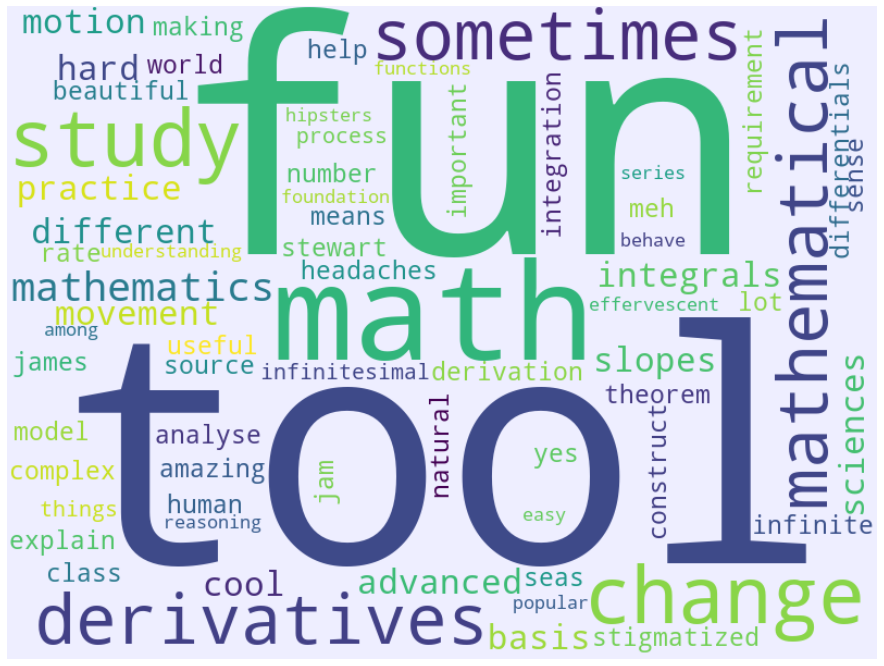

In [28]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off");

## Data over Stats

The chief advantage over commercially available solutions (Piazza, Poll Everywhere, etc.) is

  - is access to the actual data collected from students, 

  - and instant processing thereof.

# Application: Dot Products and Match-making

We collect the survey data below and store each individual's rating as a vector in $\RR^5$. We subtract 5 from each entry so the "neutral" vector $\langle 5,5,5,5,5 \rangle$ is translated to the origin. 

In [23]:
IFrame("https://docs.google.com/forms/d/e/1FAIpQLSeJFwqIt4yt5PtuyM5P7DOTuCOFfFNu2MNbZRHH-i-t5dUfaw/viewform?embedded=true",width=640,height=1549)

In [29]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo8Y7wh33vZv9uYdewzwASSfYXQsPEGWldt_lWk8MPBYnBxKprcysZ-u9hjqPIWIeqndB4f-U1oAoM/pub?gid=1201323166&single=true&output=csv"
responses = pd.read_csv(url)
qs = ['Gazpacho', 'Wrestling',
       'Driver', 'Socks',
       'Halloween']
responses.columns = ['Timestamp', 'Name'] + qs
answers = responses[qs].to_numpy() - 5
responses

,Timestamp,Name,Gazpacho,Wrestling,Driver,Socks,Halloween
0,1/27/2020 16:38:26,Drake,6,4,7,0,6
1,1/27/2020 16:38:50,Shaggy,9,9,1,5,8
2,1/27/2020 16:39:20,Björn Borg,3,8,8,8,10
3,1/27/2020 17:02:16,Tin Man,1,0,10,0,3
4,1/27/2020 17:02:42,Dorothy,10,0,10,3,8
...,...,...,...,...,...,...,...
78,1/28/2020 13:04:57,Jackmerius Tacktheritrix,10,10,10,0,10
79,1/28/2020 13:05:26,:),5,5,7,2,7
80,1/28/2020 13:13:21,X(ω) = {f (t)},10,10,10,10,10
81,1/28/2020 13:16:04,Jack Cyclone,2,6,0,0,9


### Let's graph our vectors

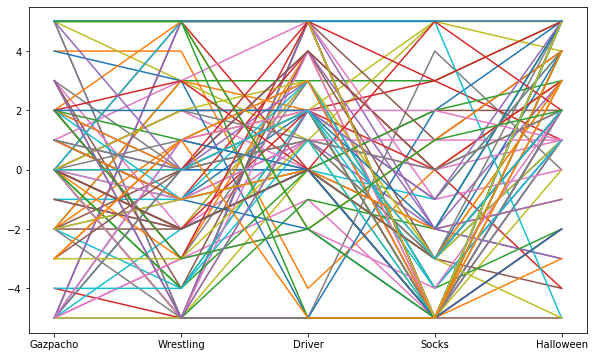

In [9]:
plt.figure(figsize=((10,6)))
plt.plot(np.transpose(answers));
plt.xticks(ticks=range(5),labels=qs);
# plt.legend(responses.Name,loc='upper right');

How will we find soul mates in this mess?

We have an easy way of determining if two vector point "in the same direction"

$$\cos \theta = \frac{\vec v\cdot \vec w}{|\vec v||\vec w|}$$

In [24]:
from numpy import dot,arccos #dot product, arccos
from numpy.linalg import norm # this is the magnitude function

out = []
for x,y in combinations(responses.index,2):
    xinfo,yinfo = responses.loc[[x,y],qs].to_numpy() - 5
#     print (xinfo,yinfo,dot(xinfo,yinfo))
    compat = dot(xinfo,yinfo)/(norm(xinfo)*norm(yinfo))
    out.append([responses.loc[x,"Name"],responses.loc[y,"Name"],compat])

results = pd.DataFrame(out,columns=["Name1","Name2","Compat"]).sort_values("Compat",ascending=False)
results

,Name1,Name2,Compat
951,Quick Brown Fox,Hot Daddy hot cakes,0.995871
943,Quick Brown Fox,Barack Obama,0.987829
1813,Wooski,Joe,0.980196
3298,Kibbles,Emma,0.980023
1596,Billy,Hot Daddy hot cakes,0.979800
...,...,...,...
1029,Balooney,Julio,-0.903047
1697,Luke Skywalker,Jason,-0.903395
2489,abdul bamba,Mani Moto,-0.919145
2474,abdul bamba,emanekaf,-0.932996


In [21]:
## Filter on a particular name here. 
mate = "Jackmerius"
results[results.Name1.str.contains(mate) | results.Name2.str.contains(mate)]

,Name1,Name2,Compat
3167,Victor Petito,Jackmerius Tacktheritrix,0.907959
2933,Jacob Nathan,Jackmerius Tacktheritrix,0.877058
3020,John Mulaney,Jackmerius Tacktheritrix,0.845154
2837,Bruce Wayne,Jackmerius Tacktheritrix,0.839254
1913,Joko Lelor,Jackmerius Tacktheritrix,0.787726
...,...,...,...
3047,Julio,Jackmerius Tacktheritrix,-0.299847
1745,Luke Skywalker,Jackmerius Tacktheritrix,-0.307794
3122,Jebediah,Jackmerius Tacktheritrix,-0.358057
2317,BadAtCalc,Jackmerius Tacktheritrix,-0.372104


## Get everyone involved

Use collective behavior where possible.

### Example - Synthesizer

The definition of the vector projection of $\vec v$ onto $\vec w$ is 

"the multiple of $\vec w$ closest to $\vec v$."

Hum louder louder or softer depending on whether the scalar multiple of $\vec w$ is close or far from $\vec v$. 

In [12]:
@interact
def _(t=(0.,8,.2),err=False):
    fig,ax = plt.subplots(1, figsize=(6,6))

    ax.set_xlim(0,8)
    ax.set_ylim(0,8)

    ax.arrow(0,0,5,3,color='r',width=.02,head_width=.1,length_includes_head=True)
    ax.arrow(0,0,t,t,color='b',width=.02,head_width=.1,length_includes_head=True)
    if err:
        ax.arrow(t,t,5-t,3-t,color='k',alpha = .3,length_includes_head=True)
#     ax.arrow(0,0,-(1-t)/2,(1-t)*3/2,alpha=.3)
#     ax.arrow(0,0,2*t - (1-t)/2,t + (1-t)*3/2,color='purple', width=.02,head_width=.1)
    ax.grid(True)
    ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-t,3-t])):.4f}$",size=22)
#     ax.plot(range(9),range(9),'k','---',alpha=.2)

interactive(children=(FloatSlider(value=4.0, description='t', max=8.0, step=0.2), Checkbox(value=False, descri…

## "Screws, not glue"

Some differentiation (in the pedagogical sense) is built in. 

  - Students with less technical comfort manipulate sliders and see results. 

  - More advanced students expose the code and tweak aspects to make their own manipulatives.

### Example

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ in a flux integral is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [ ]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])


## Commissions

I sometimes solicit constructions from students, so that they think about mathematical structures on large and small scales, and to inject a little creativity into activities.

### Example

Recall that the function $e^{-x^2}$ has the property that it peaks at 1 at $x=0$ and rapidly decays as $x \to \pm \infty$.

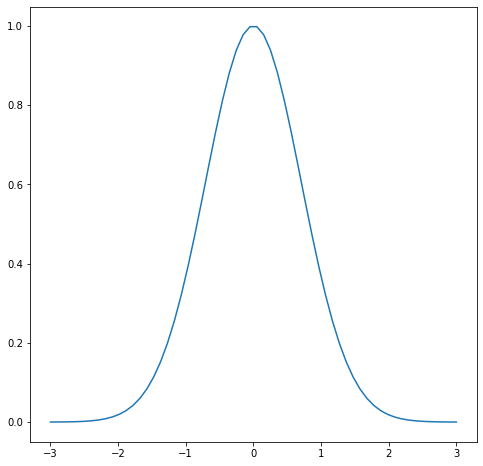

In [14]:
x = np.linspace(-3,3,60)
plt.plot(x,exp(-x**2));

The graph of the following function might be thought of as a "canyon". 

$$f(x,y) = 1-e^{-(y-x^2)^2}$$

In [15]:
def canyon(x,y):
    return 1 - exp(-(y - x**2)**2)

@interact
def _(angle=(-96,6),vangle=(0,90,6),func = fixed(canyon)):
    u = v = np.linspace(-5,5,100)
    X,Y = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,func(X,Y),cmap='gist_earth',vmax=2)

    for ch in 'xyz':
#         getattr(ax,f"set_{ch}lim")([-1,1])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)

interactive(children=(IntSlider(value=-45, description='angle', max=6, min=-96), IntSlider(value=42, descripti…

### Exercise

Make me a volcano.

In [ ]:
def volcano(x,y):
    return ## Your code here

@interact
def _(angle=(-96,6),vangle=(0,90,6),func = fixed(volcano)):
    u = v = np.linspace(-3,3,100) # adjust range if desired
    X,Y = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,func(X,Y),cmap='gist_earth',vmax=2)

    for ch in 'xyz':
        getattr(ax,f"set_{ch}lim")([-3,3])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)

# To-do list

  1. Cut out the middle corporation

  - Run a local collection point?

  - aggregate widget states

  2. Use a real graphics package
  
Courtesy [pythreejs](https://github.com/jupyter-widgets/pythreejs/blob/master/examples/Picker.ipynb)

In [30]:
view_width = 600
view_height = 400

def find_minima(f, start=(0, 0), xlim=None, ylim=None):
    rate = 0.1 # Learning rate
    max_iters = 200 # maximum number of iterations
    iters = 0 # iteration counter
    
    cur = np.array(start[:2])
    previous_step_size = 1 #
    cur_val = f(cur[0], cur[1]) 
    
    while (iters < max_iters and
           xlim[0] <= cur[0] <= xlim[1] and ylim[0] <= cur[1] <= ylim[1]):
        iters = iters + 1
        candidate = cur - rate * (np.random.rand(2) - 0.5)
        candidate_val = f(candidate[0], candidate[1])
        if candidate_val >= cur_val:
            continue   # Bad guess, try again
        prev = cur
        cur = candidate
        cur_val = candidate_val
        previous_step_size = np.abs(cur - prev)
        yield tuple(cur) + (cur_val,)

    print("The local minimum occurs at", cur)
    
def f(x, y):
    return -np.exp(-2*(x-1/2)**2-2*(y-1/2)**2) - np.exp(-2*(x+1/2)**2-2*(y+1/2)**2)

nx, ny = (20, 20)  # grid resolution
xmax = 1           # grid extent (+/-)
x = np.linspace(-xmax, xmax, nx)
y = np.linspace(-xmax, xmax, ny)
step = x[1] - x[0]
xx, yy = np.meshgrid(x, y)
# Grid lattice values:
grid_z = np.vectorize(f)(xx, yy)
# Grid square center values:
center_z = np.vectorize(f)(0.5 * step + xx[:-1,:-1], 0.5 * step + yy[:-1,:-1])

# Surface geometry:
surf_g = SurfaceGeometry(z=list(grid_z.flat), 
                         width=2 * xmax,
                         height=2 * xmax,
                         width_segments=nx - 1,
                         height_segments=ny - 1)

# Surface material. Note that the map uses the center-evaluated function-values:
surf = Mesh(geometry=surf_g,
            material=MeshLambertMaterial(map=height_texture(center_z, 'YlGnBu_r')))

# Grid-lines for the surface:
surfgrid = SurfaceGrid(geometry=surf_g, material=LineBasicMaterial(color='black'),
                       position=[0, 0, 1e-2])  # Avoid overlap by lifting grid slightly

# Set up scene:
key_light = DirectionalLight(color='white', position=[3, 5, 1], intensity=0.4)
c = PerspectiveCamera(position=[0, 3, 3], up=[0, 0, 1], aspect=view_width / view_height,
                      children=[key_light])

scene = Scene(children=[surf, c, surfgrid, AmbientLight(intensity=0.8)])

renderer = Renderer(camera=c, scene=scene,
                    width=view_width, height=view_height,
                    controls=[OrbitControls(controlling=c)])

out = Output()        # An Output for displaying captured print statements
box = VBox([renderer])
display(box)

# Picker object
hover_picker = Picker(controlling=surf, event='mousemove')
renderer.controls = renderer.controls + [hover_picker]

# A sphere for representing the current point on the surface
hover_point = Mesh(geometry=SphereGeometry(radius=0.05),
                   material=MeshLambertMaterial(color='hotpink'))
scene.add(hover_point)

# Have sphere follow picker point:
jslink((hover_point, 'position'), (hover_picker, 'point'))

coord_label = HTML()  # A label for showing hover picker coordinates

def on_hover_change(change):
    coord_label.value = 'Pink point at (%.3f, %.3f, %.3f)' % tuple(change['new'])

on_hover_change({'new': hover_point.position})
hover_picker.observe(on_hover_change, names=['point'])
box.children = (coord_label,) + box.children

# Create our picker for the double-click event ("dblclick")
click_picker = Picker(controlling=surf, event='dblclick')

def on_click(change):
    value = change['new']
    with out:
        print('Clicked on %s' % (value,))

    # Add a red sphere on the picked point
    point = Mesh(geometry=SphereGeometry(radius=0.05), 
                 material=MeshLambertMaterial(color='red'),
                 position=value)
    scene.add(point)
    
    # Plot solution as a red line, this will start out empty
    points = [value]
    line = Line2(geometry=LineGeometry(positions=points), material=LineMaterial(color='red', linewidth=2))
    scene.add(line)
    with out:  # Pick up any print statements in the algorithm
        for pt in find_minima(f, value, [-xmax, xmax], [-xmax, xmax]):
            # For each point, update the line:
            pt = list(pt)
            pt[2] += 1e-2   # offset to clear surface
            line.geometry = LineGeometry(positions=np.vstack([line.geometry.positions, pt]))


# When the point selected by the picker changes, trigger our function:
click_picker.observe(on_click, names=['point'])

# Update figure:
renderer.controls = renderer.controls + [click_picker]
box.children = box.children + (out,)

  3. Increase accessibility

## Feedback

So far, mostly anecdotal (emphasis mine):

  - "I loved your class and those **Jupyter notebook visualizations changed my world**. (Despite taking Multivariable Calc in high school, only now do I fully understand Divergence and Stokes theorems....)"
  - "He is a really smart instructor. He is also fun to talk to and a good lecturer. **His slides are amazing,** and you can tell he puts in a lot of effort to them."
  - "Professor Youngren takes great care to prepare interactive slides before each lecture. When dealing with complex topics in many dimensions, **these animations help make these ideas easier to understand**. Additionally, he makes videos to go more in depth on ideas that we didn't get to explore as much in class..."


## Thank you

### Relevant links

  - [This demo](https://github.com/drewyoungren/ipynb-demo) (including mybinder link)
  - [Github repo for APMA E2000](https://github.com/drewyoungren/ipynb-demo) 
  - [Teaching and Learning with Jupyter](https://jupyter4edu.github.io/jupyter-edu-book/) HOWTOs and best practices
  - [RISE](https://rise.readthedocs.io/) Turn notebooks into slideshows
  - [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/index.html) Author interactive features
  - [nbgitpuller](https://jupyterhub.github.io/nbgitpuller/) Make "one-click-only" links for students